In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import scipy.misc

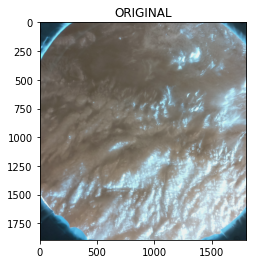

In [44]:
img = cv.imread('./dataset_image/train1.jpg')
img = img[50:2000, 400:2200]

plt.imshow(img)
plt.title('ORIGINAL')
plt.show()

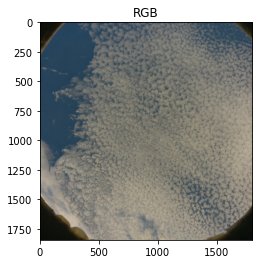

In [38]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.title('RGB')
plt.show()

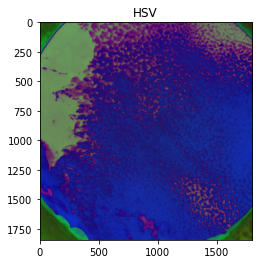

In [39]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.imshow(hsv)
plt.title('HSV')
plt.show()

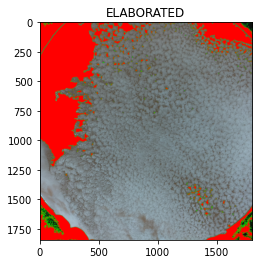

In [40]:
s = hsv[:, :, 1]
ret, thresh = cv.threshold(s, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2] 
cv.drawContours(img, contours, -1, (0,255,0), 2)

x, y, w, h = cv.boundingRect(contours[0])
thresh[y:y+h, x:x+w] = 255 - thresh[y:y+h, x:x+w]
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2]

for c in contours:
    if cv.contourArea(c) > 4:  
        cv.drawContours(img, [c], -1, (255, 0, 0), thickness=cv.FILLED)
        
plt.imshow(img)
plt.title('ELABORATED')
plt.show()

In [12]:
#count of total pixel
total = img.shape[0] * img.shape[1]
print(f"total pixel: {total}")

#count of red pixel
sought = [255,0,0]
red  = np.count_nonzero(np.all(img==sought,axis=2))
print(f"red pixel: {red}")

#perc of black pixels
perc = (red*100)/total
perc = "%.3f" % perc
print(f"perc: {perc}%")

total pixel: 1242000
red pixel: 196820
perc: 15.847%
